In [1]:
import sys
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Import supplementary visualizations code visuals.py
import visuals as vs
from sklearn.model_selection import train_test_split
# Pretty display for notebooks
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [2]:
# Initially, loading the city health behaviors and outcomes dataset
# from initial csv files. 
# csv files come with columns including year, city, measure, value etc
# so a column describes all measures, the column next describes corresponding 
# values. the code here reads in this data, then reformats
# to generate dicts with cities as keys to nested
# dicts where health metric is prevalence is the value 

'''
try:
    outcomes = pd.read_csv("500_Cities_Health_Outcomes_raw.csv", index_col = 'Unnamed: 0')
    behaviors = pd.read_csv("500_Cities_Health_Behaviors_raw.csv", index_col = 'Unnamed: 0')
    #data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Health Outcomes dataset has {} samples with {} features each.".format(*outcomes.shape)
    print "Unhealthy Behaviors dataset has {} samples with {} features each.".format(*behaviors.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
'''    
    

'\ntry:\n    outcomes = pd.read_csv("500_Cities_Health_Outcomes_raw.csv", index_col = \'Unnamed: 0\')\n    behaviors = pd.read_csv("500_Cities_Health_Behaviors_raw.csv", index_col = \'Unnamed: 0\')\n    #data.drop([\'Region\', \'Channel\'], axis = 1, inplace = True)\n    print "Health Outcomes dataset has {} samples with {} features each.".format(*outcomes.shape)\n    print "Unhealthy Behaviors dataset has {} samples with {} features each.".format(*behaviors.shape)\nexcept:\n    print "Dataset could not be loaded. Is the dataset missing?"\n'

In [ ]:

# Initially, loading the city health behaviors and outcomes dataset
# from initial csv files. 
# csv files come with columns including year, city, measure, value etc
# so a column describes all measures, the column next describes corresponding 
# values. the code here reads in this data, then reformats
# to generate dicts with cities as keys to nested
# dicts where health metric is prevalence is the value 

'''

outcomes_dict = {outcome.CityName:{outcome.Short_Question_Text: 0}}
behaviors_dict = {behavior.CityName:{behavior.Short_Question_Text: 0}}

for item in outcomes.itertuples():
    # if CityName is in current outcomes dict, just add metric and value. 
    # if not, add Cityname metric and value
    if item.CityName in outcomes_dict:
        outcomes_dict[item.CityName][item.Short_Question_Text] = item.Data_Value
    else:
        outcomes_dict[item.CityName] = {item.Short_Question_Text:item.Data_Value}
    
    # reformat latitude and longitude data
    geo_lat, geo_long = tuple(item.GeoLocation.strip('()').split(','))
    #print "lat = {} long = {}".format(geo_lat, geo_long)
    outcomes_dict[item.CityName]['GeoLat'] = float(geo_lat)
    outcomes_dict[item.CityName]['GeoLong'] = float(geo_long)
    
for item in behaviors.itertuples():
    # if CityName is in current outcomes dict, just add metric and value. 
    # if not, add Cityname metric and value
    if item.CityName in behaviors_dict:
        behaviors_dict[item.CityName][item.Short_Question_Text] = item.Data_Value
    else:
        behaviors_dict[item.CityName] = {item.Short_Question_Text:item.Data_Value}
    
    # reformat latitude and longitude data
    geo_lat, geo_long = tuple(item.GeoLocation.strip('()').split(','))
    #print "lat = {} long = {}".format(geo_lat, geo_long)
    behaviors_dict[item.CityName]['GeoLat'] = float(geo_lat)
    behaviors_dict[item.CityName]['GeoLong'] = float(geo_long)
    
    
    #behaviors_dict[item.CityName]['GeoLocation'] = item.GeoLocation
    
print item

# create dataframes from dicts
outcomes_df = pd.DataFrame.from_dict(outcomes_dict, 'index')
behaviors_df = pd.DataFrame.from_dict(behaviors_dict, 'index')


# to make future loading and unloading easier, the dataframes are
# written to csv files. we can now just read these files in already 
#formatted

outcomes_df.to_csv('500_Cities_Health_Outcomes.csv')
behaviors_df.to_csv('500_Cities_Health_Behaviors.csv')

'''

In [2]:
# reading in reformatted csv files directly into dataframes
try:
    outcomes_df = pd.read_csv('500_Cities_Health_Outcomes.csv')
    behaviors_df = pd.read_csv('500_Cities_Health_Behaviors.csv')
    print "Health Outcomes dataset has {} samples with {} features each.".format(*outcomes_df.shape)
    print "Unhealthy Behaviors dataset has {} samples with {} features each.".format(*behaviors_df.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    

#outcomes_df = outcomes_df.drop('GeoLong', 1, inplace = True)
#outcomes_df = outcomes_df.drop('GeoLat', 1, inplace = True)

Health Outcomes dataset has 474 samples with 16 features each.
Unhealthy Behaviors dataset has 474 samples with 8 features each.


In [6]:
outcomes_df.head()


,Chronic Kidney Disease,GeoLat,COPD,Cancer (except skin),Arthritis,Mental Health,GeoLong,Teeth Loss,Stroke,High Cholesterol,Current Asthma,Diabetes,Physical Health,High Blood Pressure,Coronary Heart Disease
Cities,,,,,,,,,,,,,,,
Abilene,3.3,32.454651,6.7,6.0,22.4,11.6,-99.738304,14.3,3.1,34.4,8.9,10.9,12.6,31.6,6.3
Akron,3.3,41.080144,9.4,5.7,29.0,15.3,-81.521921,23.6,3.9,33.0,11.6,13.0,15.5,36.2,7.5
Alameda,2.2,37.765085,4.3,5.7,18.5,9.8,-122.266490,7.5,2.2,31.3,7.9,8.1,9.6,24.3,4.5
Albany,2.2,42.666397,7.1,5.8,25.7,13.2,-73.798683,16.5,3.3,33.8,10.9,10.9,13.1,33.4,6.0
Albuquerque,2.9,35.105503,5.4,6.1,22.4,11.6,-106.647448,14.0,2.6,29.2,9.8,9.3,12.1,25.9,5.3


In [13]:
# this processing steps were originally performed on the data
# and data was written to the csv files to avoid these steps in 
# the future
'''
# rename index to 'Cities' in behavior and outcomes dataframes (df)
behaviors_df.rename(columns = {'Unnamed: 0': 'Cities'}, inplace = True)
behaviors_df.set_index(['Cities'], inplace = True)
behaviors_df.head()

outcomes_df.rename(columns = {'Unnamed: 0': 'Cities'}, inplace = True)
outcomes_df.set_index(['Cities'], inplace = True)
#outcomes_df.index.names = ['Cities']
outcomes_df.head()

# combine outcomes and behaviors into one df so we can do correlations
# across all variablesz
'''

"\n# rename index to 'Cities' in behavior and outcomes dataframes (df)\nbehaviors_df.rename(columns = {'Unnamed: 0': 'Cities'}, inplace = True)\nbehaviors_df.set_index(['Cities'], inplace = True)\nbehaviors_df.head()\n\noutcomes_df.rename(columns = {'Unnamed: 0': 'Cities'}, inplace = True)\noutcomes_df.set_index(['Cities'], inplace = True)\n#outcomes_df.index.names = ['Cities']\noutcomes_df.head()\n\n# combine outcomes and behaviors into one df so we can do correlations\n# across all variablesz\n"

In [8]:
frames = [outcomes_df, behaviors_df]
datacorr_df = pd.concat(frames, axis=1)
datacorr_df.head()


,Chronic Kidney Disease,GeoLat,COPD,Cancer (except skin),Arthritis,Mental Health,GeoLong,Teeth Loss,Stroke,High Cholesterol,...,Physical Health,High Blood Pressure,Coronary Heart Disease,GeoLat,Current Smoking,Physical Activity,GeoLong,Binge Drinking,Sleep,Obesity
Cities,,,,,,,,,,,,,,,,,,,,,
Abilene,3.3,32.454651,6.7,6.0,22.4,11.6,-99.738304,14.3,3.1,34.4,...,12.6,31.6,6.3,32.454651,19.6,27.7,-99.738304,16.2,35.4,33.7
Akron,3.3,41.080144,9.4,5.7,29.0,15.3,-81.521921,23.6,3.9,33.0,...,15.5,36.2,7.5,41.080144,26.8,31.0,-81.521921,14.8,44.1,37.3
Alameda,2.2,37.765085,4.3,5.7,18.5,9.8,-122.266490,7.5,2.2,31.3,...,9.6,24.3,4.5,37.765085,11.9,18.7,-122.266490,15.0,32.3,18.7
Albany,2.2,42.666397,7.1,5.8,25.7,13.2,-73.798683,16.5,3.3,33.8,...,13.1,33.4,6.0,42.666397,19.0,26.1,-73.798683,15.5,39.7,31.1
Albuquerque,2.9,35.105503,5.4,6.1,22.4,11.6,-106.647448,14.0,2.6,29.2,...,12.1,25.9,5.3,35.105503,18.8,20.4,-106.647448,14.5,32.8,25.5


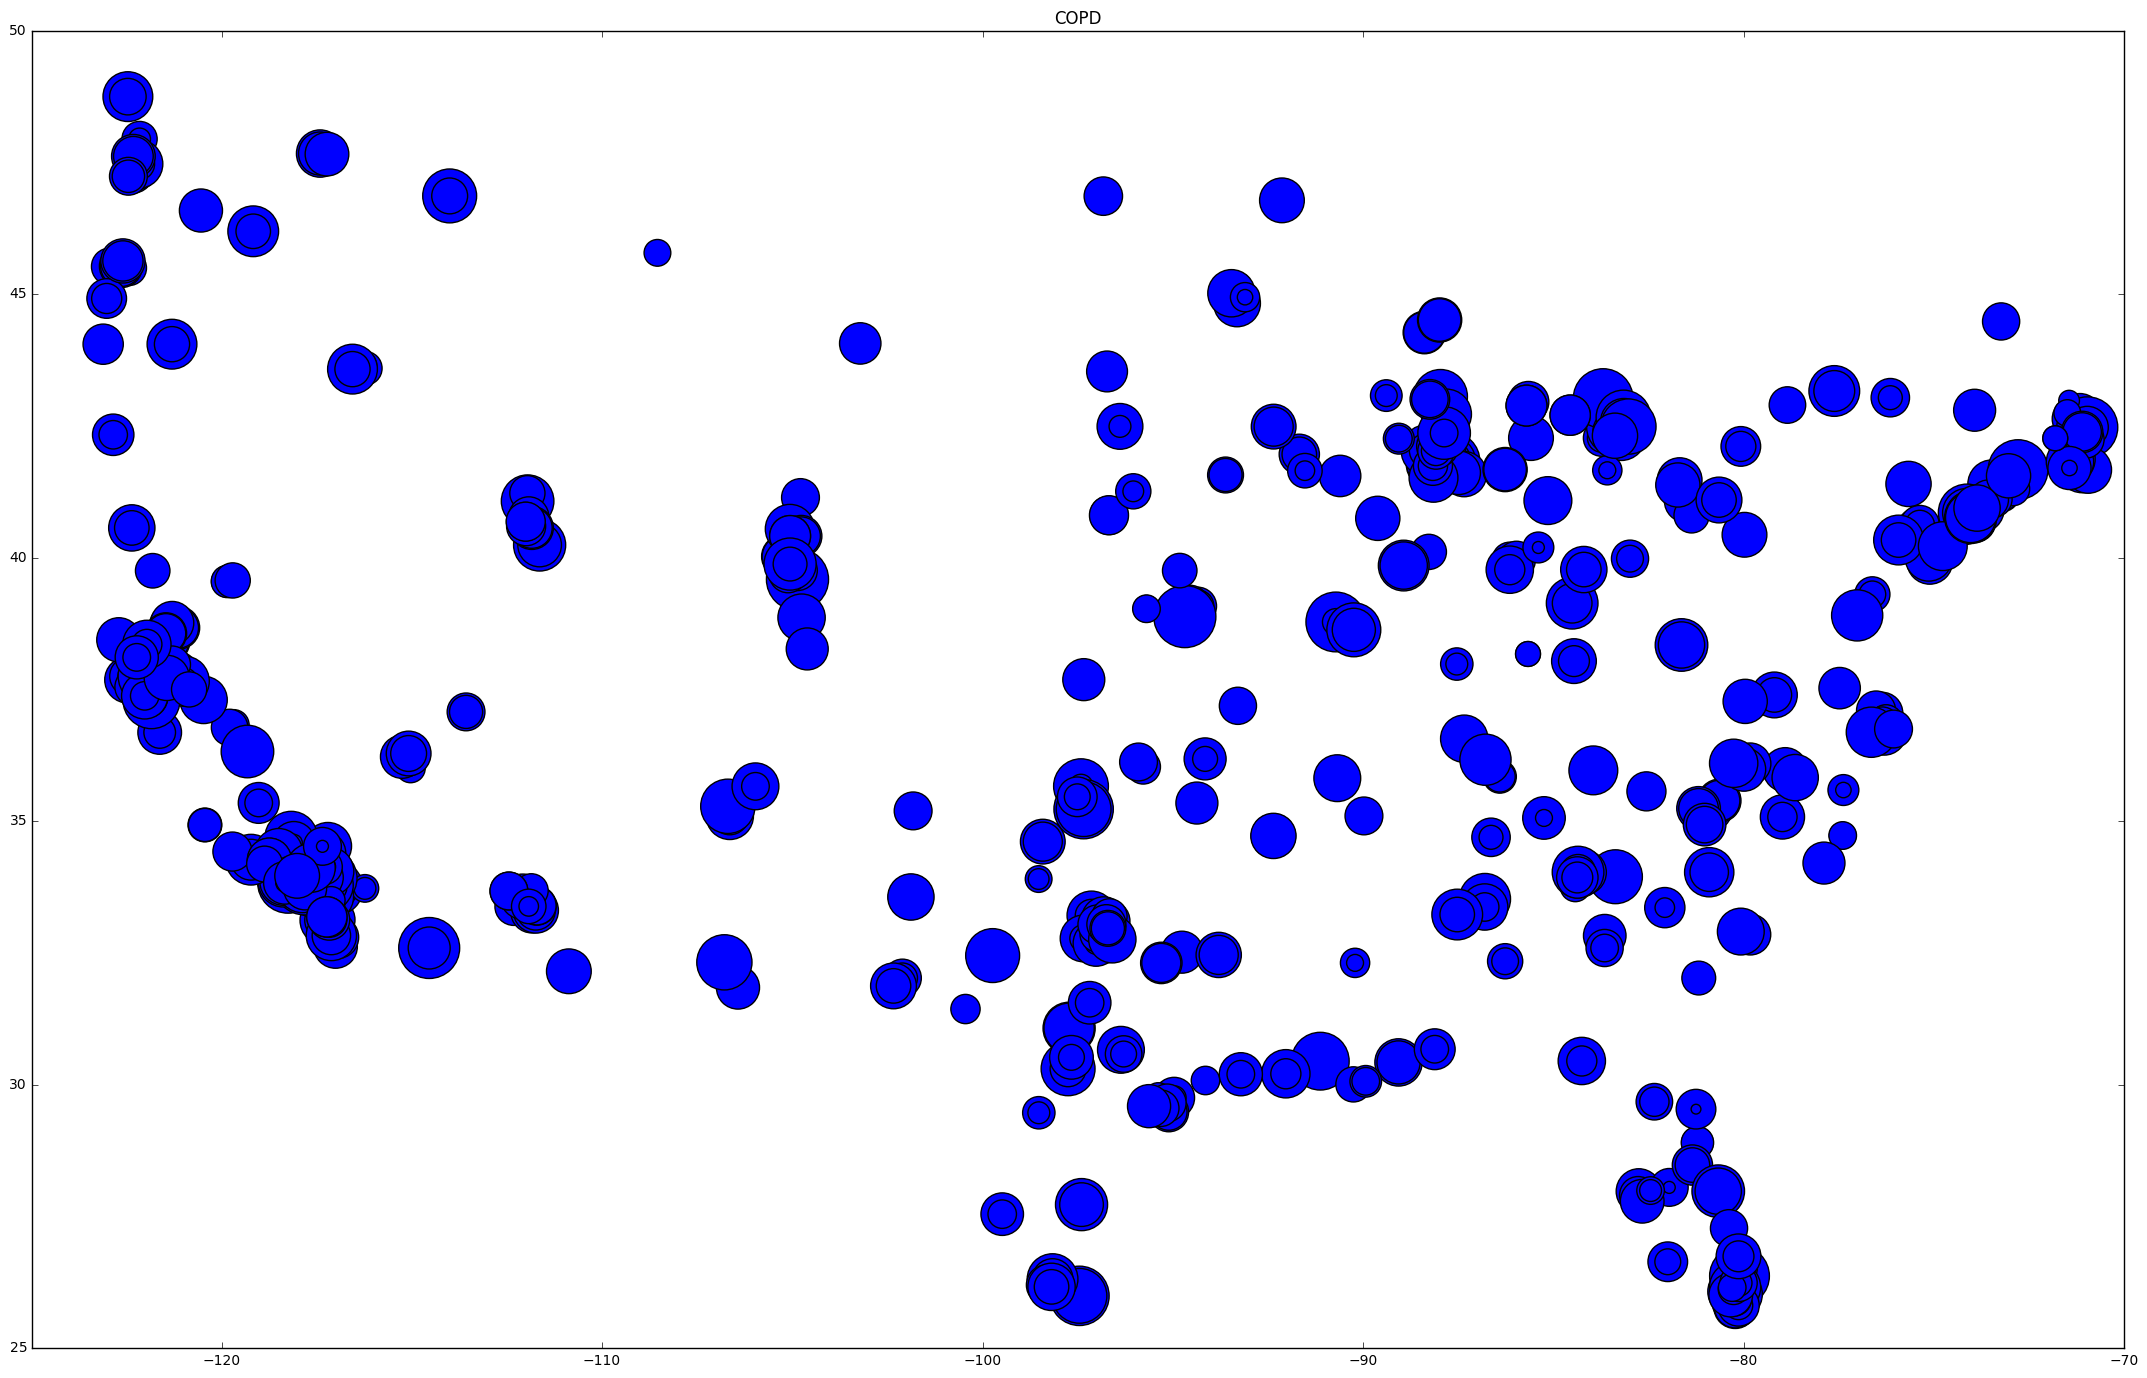

In [12]:
# code for displaying a cities condition prevalence, in this case COPD
# in its geographical location i.e. on a map, with the marker size 
# proportional to the prevalence value

# prevalence values are normalized 
#display(high_corr)
maxCOPD = datacorr_df.COPD.max()
minCOPD = datacorr_df.COPD.min()
rangeCOPD = maxCOPD - minCOPD

#plot data 
f, ax = plt.subplots(figsize=(55/2,35/2))
ax.set_title('COPD')
#plt.title("COPD in Continental US")
ax.axis([-125.0, -70.0, 25.0, 50.0])

COPD_prev = (datacorr_df['COPD'] - minCOPD)/rangeCOPD

# error message says element-wise comparison fails but plot still works

ax.scatter(datacorr_df.GeoLong, datacorr_df.GeoLat, s = 2000*COPD_prev)
#plt.figure(figsize =(20,10))
#plt.scatter(datacorr_df.GeoLong, datacorr_df.GeoLat, s = 30*(datacorr_df.COPD-minCOPD)/rangeCOPD)
plt.show()

In [24]:
# perform corrlation between all outcomes and behaviors
# select correlation values above certain thresholds and create
# list of correlated variables

#corr_threshold = 0.80
high_corr = datacorr_df.corr()
#high_corr = high_corr[abs(high_corr) >= corr_threshold]

col_names = high_corr.columns
#display(high_corr.iloc[0].name)
#display(high_corr.iloc[0][0])
#display(col_names[0])
stroke_df = high_corr.Stroke
stroke_df.head()

Chronic Kidney Disease    0.685028
GeoLat                   -0.059188
COPD                      0.831702
Cancer (except skin)     -0.221284
Arthritis                 0.725383
Name: Stroke, dtype: float64

In [21]:
'''
# print items to confirm what we've got
for item in high_corr.head().itertuples():
    for i in range(len(item)):
        if not pd.isnull(item[i]):
            print "{}   {}".format(col_names[i], item[i])
'''


'\n# print items to confirm what we\'ve got\nfor item in high_corr.head().itertuples():\n    for i in range(len(item)):\n        if not pd.isnull(item[i]):\n            print "{}   {}".format(col_names[i], item[i])\n'

In [11]:
not pd.isnull(item[i])

False

In [25]:
stroke_df

Chronic Kidney Disease    0.685028
GeoLat                   -0.059188
COPD                      0.831702
Cancer (except skin)     -0.221284
Arthritis                 0.725383
Mental Health             0.835944
GeoLong                   0.364517
Teeth Loss                0.885558
Stroke                    1.000000
High Cholesterol          0.530339
Current Asthma            0.677891
Diabetes                  0.877367
Physical Health           0.843972
High Blood Pressure       0.874823
Coronary Heart Disease    0.876573
GeoLat                   -0.059188
Current Smoking           0.780398
Physical Activity         0.813787
GeoLong                   0.364517
Binge Drinking           -0.489722
Sleep                     0.776520
Obesity                   0.852384
Name: Stroke, dtype: float64

In [36]:
# looking at variables correlated with Stroke
#figure out how to generate a list of the names of things highly correlated 
#with stroke
corr_threshold = 0.7
stroke_preds = []


for i in range(len(stroke_df)):
    val = abs(stroke_df[i])
    if val > corr_threshold:
        print "{}   {}".format(stroke_df.axes[0][i], stroke_df[i])
        stroke_preds.append(stroke_df.axes[0][i])

        
'''
for i in range(len(high_corr['Stroke'])):
    val = high_corr['Stroke'][i]
    if val > corr_threshold:
        print "{}   {}".format(high_corr.axes[0][i], val)
        stroke_preds.append(high_corr.axes[0][i])

'''

# stroke is correlated with itself so we remove it as a variable
stroke_preds.remove('Stroke')

print stroke_preds



COPD   0.831702134952
Arthritis   0.725383441921
Mental Health   0.835944251227
Teeth Loss   0.885558062872
Stroke   1.0
Diabetes   0.877367244945
Physical Health   0.843972193685
High Blood Pressure   0.874823345389
Coronary Heart Disease   0.876572867993
Current Smoking   0.780397688255
Physical Activity   0.813787042293
Sleep   0.776520240095
Obesity   0.852384375754
['COPD', 'Arthritis', 'Mental Health', 'Teeth Loss', 'Diabetes', 'Physical Health', 'High Blood Pressure', 'Coronary Heart Disease', 'Current Smoking', 'Physical Activity', 'Sleep', 'Obesity']


,COPD,Arthritis,Mental Health,Teeth Loss,Diabetes,Physical Health,High Blood Pressure,Coronary Heart Disease,Current Smoking,Physical Activity,Sleep,Obesity
Cities,,,,,,,,,,,,
Abilene,6.7,22.4,11.6,14.3,10.9,12.6,31.6,6.3,19.6,27.7,35.4,33.7
Akron,9.4,29.0,15.3,23.6,13.0,15.5,36.2,7.5,26.8,31.0,44.1,37.3
Alameda,4.3,18.5,9.8,7.5,8.1,9.6,24.3,4.5,11.9,18.7,32.3,18.7
Albany,7.1,25.7,13.2,16.5,10.9,13.1,33.4,6.0,19.0,26.1,39.7,31.1
Albuquerque,5.4,22.4,11.6,14.0,9.3,12.1,25.9,5.3,18.8,20.4,32.8,25.5


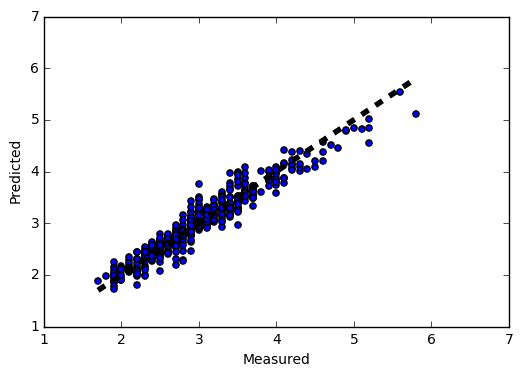

In [37]:
# behaviors_only_df = behaviors_df.drop(['GeoLong'], axis = 1)
# behaviors_only_df.head()
# create linear regression cross validation prediction using stroke_preds as X and stroke prevalence as y
# plot the predicted stroke prevalence against the actual


lr = LinearRegression()
X = datacorr_df[stroke_preds]
display(X.head())
y = datacorr_df.Stroke
predicted = cross_val_predict(lr, X, y, cv = 10 )

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

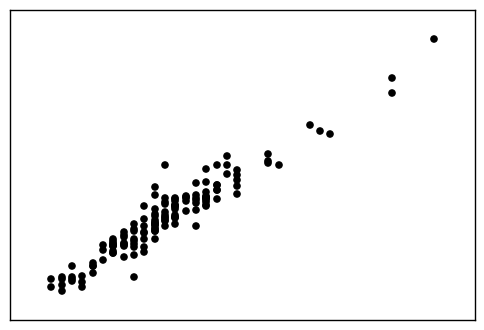

In [38]:
# creating linear regression, training on a subset of the data, 70%
# testing on 30%. plotting the predicted stroke values against the 
# actual test set values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,
                                                   random_state = 42)

lr.fit(X_train, y_train)
lr.score(X_test, y_test)
predicted = lr.predict(X_test)


plt.scatter(y_test, predicted,  color='black')
#plt.scatter(X_test['Current Smoking'], lr.predict(X_test), color='blue',
#         linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

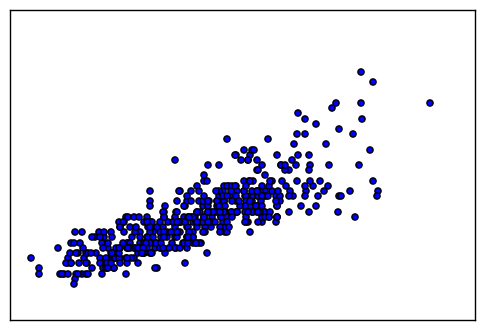

In [39]:
plt.scatter(X['Physical Activity'], y)
plt.xticks(())
plt.yticks(())
plt.show()



0.90986315603394086

mean squared error between predicted and actual = 0.0306448230384


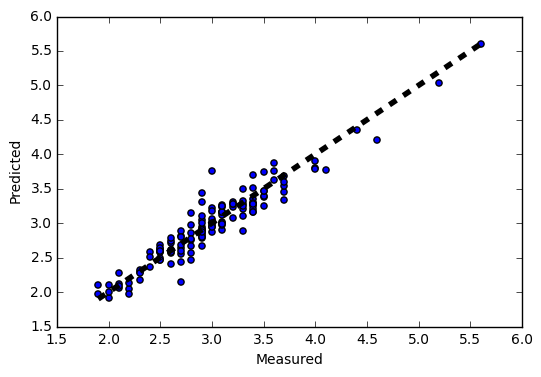

In [86]:
# similar to what was done above where stroke predictors were used as X, stroke prevalence as y
# linear regressor was trained on training data and tested using testing data. 

stroke_y = datacorr_df['Stroke']
#display(stroke_y.head())
stroke_X = datacorr_df[stroke_preds]
#display(stroke_X.head())
X_train, X_test, y_train, y_test = train_test_split(stroke_X, stroke_y, test_size = 0.29,
                                                   random_state = 42)
lr.fit(X_train, y_train)
display(lr.score(X_test, y_test))

predicted = lr.predict(X_test)

print "mean squared error between predicted and actual = {}".format(np.mean((predicted - y_test)**2))

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

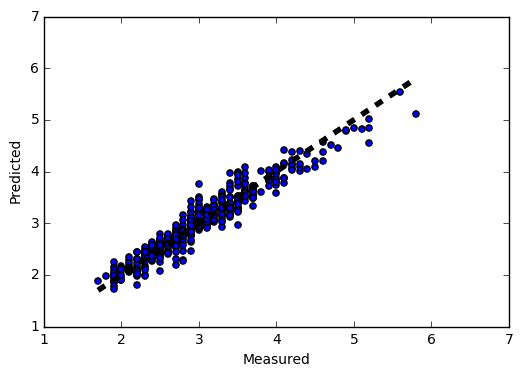

In [50]:
# similar to what was done above where stroke predictors were used as X, 
# stroke prevalence was used as y and a cross_validation prediction was performed
# using the entire dataset. 


predicted = cross_val_predict(lr, stroke_X, stroke_y, cv = 10)
fig, ax = plt.subplots()
ax.scatter(stroke_y, predicted)
ax.plot([stroke_y.min(), stroke_y.max()], [stroke_y.min(), stroke_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [43]:
print np.mean((predicted - stroke_y)**2)

0.0338854724703


In [62]:
from sklearn import svm
print "wonk"

wonk


In [73]:
#using support vector machine classifier to predict

X_train, X_test, y_train, y_test = train_test_split(stroke_X, stroke_y, test_size = 0.35,
                                                   random_state = 42)
clf = svm.SVR(kernel = "linear", C = 1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.92799860254076016

In [78]:
scores = cross_val_score(clf, X_test, y_test, cv =  )

In [79]:
scores.mean()

0.88705867440585384

In [84]:
pow(scores.std(),2)

0.0016044958729494407

In [98]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(stroke_X, stroke_y, test_size = 0.5,
                                                   random_state = 42)
lr.fit(X_train, y_train)
predicted = cross_val_predict(lr, X_test, y_test, cv = 5)
metrics.r2_score(y_test, predicted)

0.92330330904498481

In [26]:
print "wonk"

wonk


In [91]:
clf2 = svm.SVR(kernel = "poly", C = 1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.90879366140310203